In [1]:
# importing all the needed library.
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#set a max no_of_rows displayed
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

In [2]:
#read dataset

raw_df = pd.read_csv('AmesHousing.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

I was able to load my data on panda and also view some of them scattered.

In [3]:
#shape of dataset

raw_df.shape

(2930, 82)

This code helps in knowing the shape of my data which gives me insight on what i'm working with like the number of columns.

In [4]:
#display top 5 rows

raw_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


This makes me see the first top five rows of my data to know if my object has the right type of data.

In [5]:
#display last 5 rows

raw_df.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


I was able to see my last 5 rows and also verify my data so as to know if everything correlate in the data set.

In [6]:
#describe the dataset more closely

descr= raw_df.describe()
descr

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


i did this to analyse my data in the dataframe so as to have good overview of what is contained in my dataset, it shows the statistical part upper percentile, lower percentile e.tc.

In [7]:
#dropped columns in 'Gr Liv Area' with more than 4000 square feet from the dataset as recommended in the description
#5 rows were dropped

raw_df.drop(index=raw_df.loc[raw_df.loc[:,'Gr Liv Area'] > 4000].index, inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2925 non-null   object 
 9   Land Contour     2925 non-null   object 
 10  Utilities        2925 non-null   object 
 11  Lot Config       2925 non-null   object 
 12  Land Slope       2925 non-null   object 
 13  Neighborhood     2925 non-null   object 
 14  Condition 1      2925 non-null   object 
 15  Condition 2      2925 non-null   object 
 16  Bldg Type        2925 non-null   object 
 17  House Style      29

The description suggest that there are 5 unusual observations with utliers and unusual sales. Removing columns in 'Gr Liv Area' with more than 4000 square feet eliminates all of the 5 unusual observations.

In [8]:
#added a prefix to MS Subclass "MSC" to change it from integer to string as it's a nominal column. 

raw_df['MS SubClass'] = raw_df['MS SubClass'].apply(lambda x: 'MSC' + str(x).rjust(3, '0')).astype(str)
raw_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,MSC020,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,MSC020,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,MSC020,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,MSC020,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,MSC060,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


loc function is used to change the prefix MS Subclass to MSC so as to change it from integer to string.

In [9]:
#Examining columns with missing values.

null_stats = pd.DataFrame(raw_df.isnull().sum(), columns=['count_of_missing_value'])
null_stats.loc[:,'percentage_of_dataset'] = np.round(null_stats.loc[:,'count_of_missing_value'] / raw_df.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'count_of_missing_value']>0,:].sort_values(by='count_of_missing_value', ascending=False)

,count_of_missing_value,percentage_of_dataset
Pool QC,2914,99.62
Misc Feature,2820,96.41
Alley,2727,93.23
Fence,2354,80.48
Mas Vnr Type,1774,60.65
...,...,...
Electrical,1,0.03
Total Bsmt SF,1,0.03
Bsmt Unf SF,1,0.03
Garage Area,1,0.03


pandas is used to check columns with missing values and less than 2925 non-null values which shows the existence of missing values are examined to look at their percentage and count of missing values.

In [10]:
#dropping the first five columns with the more than 50% percentage missing data.

raw_df.drop(columns= ['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   object 
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual     29

Null values can skew data, increase computational time and reduce efficiency, removing columns where more than 50% of the column are null values only makes sense to keep the data, and eventaully visualisation unbiased after removing the missing column the dataset is set to be left inplace, no shuffling whatsoever.





In [38]:
def fill_and_replace(column_name, fill_value, map_dict, verbose=False, cast_to_int=False):
    result = raw_df[column_name].copy()

    # Fill missing values
    if fill_value is not None:
        result = result.fillna(fill_value)

    # Replace using map_dict
    result = result.replace(map_dict)

    # Prevent downcasting warnings by inferring types explicitly
    result = result.infer_objects(copy=False)

    # Cast to int if needed
    if cast_to_int:
        result = result.astype(int)

    if verbose:
        print(f"{column_name} value counts:\n{result.value_counts(dropna=False)}\n")

    return result


python helper function is added to perform this fill-and-replace task so as to process missing values.

In [12]:
#display info about dataset

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   object 
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual     29

After removing all unwanted values, i use this to know what's left in my dataset.

In [39]:
#Fix missing values in ordinal columns with non-numeric data, referencing the documentation provided.
raw_df['Garage Cond'] = fill_and_replace('Garage Cond', 'NA', {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, verbose=False, cast_to_int=True)
raw_df['Garage Qual'] = fill_and_replace('Garage Qual', 'NA', {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, verbose=False, cast_to_int=True)
raw_df['Garage Finish'] = fill_and_replace('Garage Finish', 'NA', {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}, verbose=False, cast_to_int=True)
raw_df['Bsmt Exposure'] = fill_and_replace('Bsmt Exposure', 'NA', {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, verbose=False, cast_to_int=True)
raw_df['BsmtFin Type 1'] = fill_and_replace('BsmtFin Type 1', 'NA', {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, verbose=False, cast_to_int=True)
raw_df['BsmtFin Type 2'] = fill_and_replace('BsmtFin Type 2', 'NA', {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, verbose=False, cast_to_int=True)
raw_df['Bsmt Cond'] = fill_and_replace('Bsmt Cond', 'NA', {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, verbose=False, cast_to_int=True)
raw_df['Bsmt Qual'] = fill_and_replace('Bsmt Qual', 'NA', {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, verbose=False, cast_to_int=True)


In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   object 
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual     29

It was observed from the last command that there are missing values in ordinal columns, this missing values needs to be fixed with non-numeric data to make more sense of the data.

In [15]:
#Fix missing values in nominal columns inspecting Garage Type 

print(raw_df.loc[:,'Garage Type'].value_counts(dropna=False))
print('\n')
print(raw_df.loc[raw_df.loc[:,'Garage Type'].isnull(),'Garage Area'].value_counts(dropna=False))

Garage Type
Attchd     1727
Detchd      782
BuiltIn     185
NaN         157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64


Garage Area
0.0    157
Name: count, dtype: int64


the values in nominal columns are fixed too just like the ordinal columns,inspecting Garage Type because it was noticed that values with NAN in Garage Type has 0 in Garage Area.

In [16]:
#replace null values with NA

raw_df.loc[:,'Garage Type'] = raw_df.loc[:,'Garage Type'].fillna('NA')
print(raw_df.loc[:,'Garage Type'].value_counts(dropna=False))

Garage Type
Attchd     1727
Detchd      782
BuiltIn     185
NA          157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64


There are still missing or unknown values in Garage type column so i replace with NA to fix the issue.

In [17]:
#Fix missing values in nominal columns inspecting Mas Vnr Type 


print(raw_df.loc[:,'Mas Vnr Type'].value_counts(dropna=False))
print('\n')
print(raw_df.loc[raw_df.loc[:,'Mas Vnr Type'].isnull(),'Mas Vnr Area'].value_counts(dropna=False))

Mas Vnr Type
NaN        1774
BrkFace     879
Stone       246
BrkCmn       25
CBlock        1
Name: count, dtype: int64


Mas Vnr Area
0.0      1744
NaN        23
1.0         3
344.0       1
312.0       1
285.0       1
288.0       1
Name: count, dtype: int64


It was noticed that values with NAN in Mas Vnr Type has 0 in Mas Vnr Area, the values in nominal columns are fixed inspecting Mas Vnr Type.

In [18]:
#Fix missing values in nominal columns inspecting Mas Vnr Type 

raw_df.loc[:,'Mas Vnr Type'] = raw_df.loc[:,'Mas Vnr Type'].fillna('None')
print(raw_df.loc[:,'Mas Vnr Type'].value_counts(dropna=False))

Mas Vnr Type
None       1774
BrkFace     879
Stone       246
BrkCmn       25
CBlock        1
Name: count, dtype: int64


All missing values in nominal columns inspecting Mas Vnr Type are replaced with 'None' to get a the column view.

In [19]:
#Fix missing values in ordinal columns inspecting Electrical

print(raw_df.loc[:,'Electrical'].value_counts(dropna=False))
print('\n')

Electrical
SBrkr    2677
FuseA     188
FuseF      50
FuseP       8
NaN         1
Mix         1
Name: count, dtype: int64




Missing values in ordinal columns are fixed,Electrical is well inspected.

In [20]:
#replaced NaN values with Mix

raw_df.loc[:,'Electrical'] = raw_df.loc[:,'Electrical'].fillna('Mix')
print(raw_df.loc[:,'Electrical'].value_counts(dropna=False))

Electrical
SBrkr    2677
FuseA     188
FuseF      50
FuseP       8
Mix         2
Name: count, dtype: int64


Nan values are replaced with Mix 

In [21]:
#display Lot Frontage column

raw_df.loc[:,['Lot Frontage']].describe()

,Lot Frontage
count,2435.000000
mean,69.023819
std,22.710918
min,21.000000
25%,58.000000
50%,68.000000
75%,80.000000
max,313.000000


I need to see what's in Lot Frontage Column so as to be sure of what to do next.

In [22]:
#evaluate the mean for Lot frontage

print('Lot Frontage mean: {}'.format(np.round(raw_df.loc[:,'Lot Frontage'].mean(), 0)))
raw_df.loc[:,'Lot Frontage'] = raw_df.loc[:,'Lot Frontage'].fillna(np.round(raw_df.loc[:,'Lot Frontage'].mean(), 0))

Lot Frontage mean: 69.0


Non values can be replaced when they have like 70%/80% similar or close values is by getting the mean and then replace the empty place with the mean value using numpy to round it up to the nearest whole number.

In [23]:
#Mas Vnr Area column has missing values, we check out Mas Vnr Type for any possible clues

print(raw_df.loc[:,'Mas Vnr Area'].value_counts(dropna=False))
print('\n')
print(raw_df.loc[raw_df.loc[:,'Mas Vnr Area'].isnull(),'Mas Vnr Type'].value_counts(dropna=False))

Mas Vnr Area
0.0      1747
NaN        23
120.0      15
176.0      13
200.0      13
         ... 
293.0       1
653.0       1
630.0       1
382.0       1
443.0       1
Name: count, Length: 443, dtype: int64


Mas Vnr Type
None    23
Name: count, dtype: int64


In [24]:
#since there are no Mas Vnr Type, there can not be Mas Vnr Area

raw_df.loc[:,'Mas Vnr Area'] = raw_df.loc[:,'Mas Vnr Area'].fillna(0.0)
raw_df.loc[:,'Mas Vnr Area'].value_counts(dropna=False)

Mas Vnr Area
0.0      1770
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
293.0       1
653.0       1
630.0       1
382.0       1
443.0       1
Name: count, Length: 442, dtype: int64

In [25]:
# check out the basement related columns with missing values.
raw_df.loc[raw_df.loc[:,'Total Bsmt SF'].isnull(),['Order','BsmtFin Type 1','BsmtFin Type 2','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1','Bsmt Half Bath','Bsmt Full Bath']]

,Order,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,BsmtFin SF 1,Bsmt Half Bath,Bsmt Full Bath
1341,1342,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The basement related columns was checked for missing values inspect with reference to missing Total Bsmt SF value, alongside BsmtFin Type 1 and BsmtFin Type 2 


In [26]:
# basement half and full baths missing in 2 records

raw_df.loc[raw_df.loc[:,'Bsmt Half Bath'].isnull(),['Order','BsmtFin Type 1','BsmtFin Type 2','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1','Bsmt Half Bath','Bsmt Full Bath']]

,Order,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,BsmtFin SF 1,Bsmt Half Bath,Bsmt Full Bath
1341,1342,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1497,1498,0,0,0.0,0.0,0.0,0.0,NaN,NaN


In [27]:
# Conveniently, this property does not have basements at all, so we fill 0 to all the above missing spots

raw_df.loc[raw_df.loc[:,'Order']==1342,'Total Bsmt SF'] = 0.0
raw_df.loc[raw_df.loc[:,'Order']==1342,'Bsmt Unf SF'] = 0.0
raw_df.loc[raw_df.loc[:,'Order']==1342,'BsmtFin SF 2'] = 0.0
raw_df.loc[raw_df.loc[:,'Order']==1342,'BsmtFin SF 1'] = 0.0
raw_df.loc[raw_df.loc[:,'Order'].isin([1342,1498]),'Bsmt Half Bath'] = 0
raw_df.loc[raw_df.loc[:,'Order'].isin([1342,1498]),'Bsmt Full Bath'] = 0
raw_df.loc[raw_df.loc[:,'Order'].isin([1342,1498]),['Order','BsmtFin Type 1','BsmtFin Type 2','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1','Bsmt Half Bath','Bsmt Full Bath']]

,Order,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,BsmtFin SF 1,Bsmt Half Bath,Bsmt Full Bath
1341,1342,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1497,1498,0,0,0.0,0.0,0.0,0.0,0.0,0.0


There's no basement found for all properties in this order so we fill all with 0 so as to cover up for all the spaces found.

In [28]:
#1 record has Garage Area value missing.

raw_df.loc[raw_df.loc[:,'Garage Area'].isnull(),['Order', 'Garage Type','Garage Finish','Garage Area','Garage Qual','Garage Cond','Garage Yr Blt','Garage Cars']]

,Order,Garage Type,Garage Finish,Garage Area,Garage Qual,Garage Cond,Garage Yr Blt,Garage Cars
2236,2237,Detchd,0,NaN,0,0,NaN,NaN


Garage area value was found missing so i extract that record with its garage-related columns.

In [29]:
#no garage present,Garage Type column indicates otherwise.

raw_df.loc[(raw_df.loc[:,'Garage Type']=='Detchd') & (raw_df.loc[:,'Garage Area']==0),:]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


i check out the areas of all other properties with Garage Type as Detchd and Garage Area as 0: so as to be sure.

In [30]:
#with the Id value of the faulty record, replace missing Garage Area as 0.0 and Garage Type to NA

raw_df.loc[raw_df.loc[:,'Order']==2237,'Garage Area'] = 0.0
raw_df.loc[raw_df.loc[:,'Order']==2237,'Garage Type'] = 'NA'
raw_df.loc[raw_df.loc[:,'Order']==2237,'Garage Cars'] = 0
raw_df.loc[raw_df.loc[:,'Order']==2237,['Order', 'Garage Type','Garage Finish','Garage Area','Garage Qual','Garage Cond','Garage Yr Blt','Garage Cars']]

,Order,Garage Type,Garage Finish,Garage Area,Garage Qual,Garage Cond,Garage Yr Blt,Garage Cars
2236,2237,NA,0,0.0,0,0,NaN,0.0


I use this to count properties that have null as garage type, so as to drop them and replace with NA.

In [31]:
#inspect Garage Yr Blt more closely
#159 properties with no garages, leave Garage Yr Blt values as it is

print(raw_df.loc[:,'Garage Yr Blt'].value_counts(dropna=False))
print('\n')
print(raw_df.loc[raw_df.loc[:,'Garage Yr Blt'].isnull(),'Garage Type'].value_counts(dropna=False))

Garage Yr Blt
NaN       159
2005.0    142
2006.0    115
2007.0    114
2004.0     99
         ... 
1908.0      1
1933.0      1
2207.0      1
1943.0      1
1919.0      1
Name: count, Length: 104, dtype: int64


Garage Type
NA        158
Detchd      1
Name: count, dtype: int64


I'm inspecting Garage Yr Blt more closely here.

In [40]:
# Map numeric values in ordinal columns with complete data

raw_df['Lot Shape'] = fill_and_replace('Lot Shape', None, {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}, verbose=False, cast_to_int=True)
raw_df['Utilities'] = fill_and_replace('Utilities', None, {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}, verbose=False, cast_to_int=True)
raw_df['Land Slope'] = fill_and_replace('Land Slope', None, {'Sev': 0, 'Mod': 1, 'Gtl': 2}, verbose=False, cast_to_int=True)
raw_df['Exter Qual'] = fill_and_replace('Exter Qual', None, {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, verbose=False, cast_to_int=True)
raw_df['Exter Cond'] = fill_and_replace('Exter Cond', None, {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, verbose=False, cast_to_int=True)
raw_df['Heating QC'] = fill_and_replace('Heating QC', None, {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, verbose=False, cast_to_int=True)
raw_df['Electrical'] = fill_and_replace('Electrical', None, {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4}, verbose=False, cast_to_int=True)
raw_df['Kitchen Qual'] = fill_and_replace('Kitchen Qual', None, {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, verbose=False, cast_to_int=True)
raw_df['Functional'] = fill_and_replace('Functional', None, {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}, verbose=False, cast_to_int=True)
raw_df['Paved Drive'] = fill_and_replace('Paved Drive', None, {'N': 0, 'P': 1, 'Y': 2}, verbose=False, cast_to_int=True)


For this part i'm filling and replacing everything one last time, checking all properties for the last time before visualization.

In [33]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   object 
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2925 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Lot Shape        2925 non-null   int64  
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   int64  
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   int64  
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual     29

I have to confirm my dataset to know what i'm going into Visualization phase with.

# **Data Visualization**

# **Analysis of continuous variables and SalePrice**
One of the major factors that affect the price of property would be the size of it. One of the metric that is important in this dataset is the Gr Liv Area, which would give us the general size of the property.

## **Scatter plot of `Gr Liv Area` vs `SalePrice`**

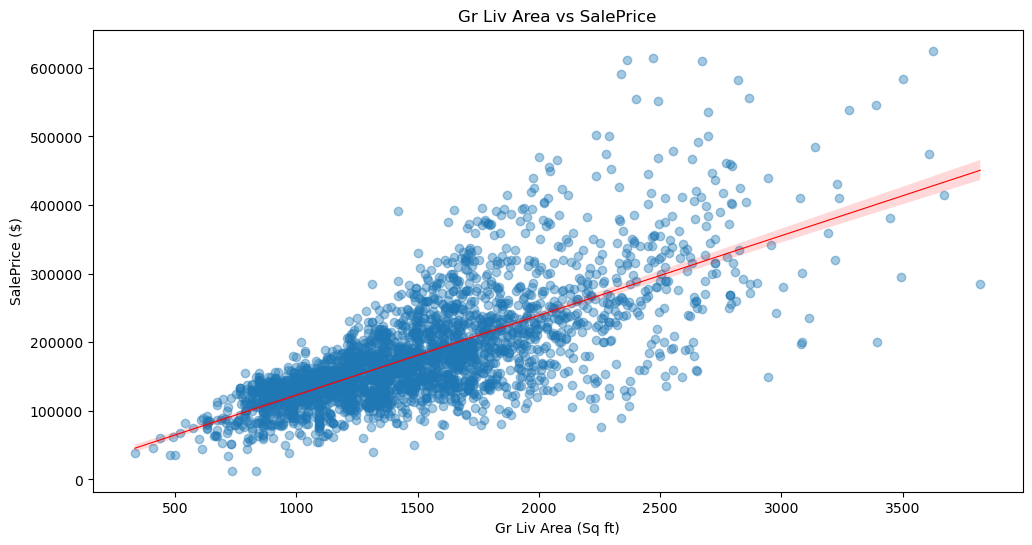

In [34]:
# Plotting a scatter plot of the Gr Liv Area against Saleprice
plt.figure(figsize=(12,6))
g = sns.regplot(data=raw_df, x='Gr Liv Area', y='SalePrice', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.xlabel(xlabel='Gr Liv Area (Sq ft)')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Gr Liv Area vs SalePrice')
plt.show()

I observe that there is a positive correlation between the two columns, i.e. sale price tends to increase alongside the size of living space. I also notice that majority of property living space sizes are clustered between 750 to 2,000 square feet, and majority prices seem to fall between 75,000 dollars to 200,000 dollars.

# **Boxplot analysis of nominal variables**
## Analysis of relationship between `Neighborhood` and `SalePrice`
Apart from size of living space, the location is also a critical factor in determining the price of properties. This is captured in the `Neighborhood` column of the dataset. We can plot the spread of sale prices for all the 28 neighborhoods.

In [35]:
# build a dataframe of neighborhoods sorted by decreasing median price for easier analysis
median_price_by_nghd = raw_df.groupby('Neighborhood') \
                              .agg(Sale_Price=('SalePrice', 'median')) \
                              .sort_values('Sale_Price', ascending=False)

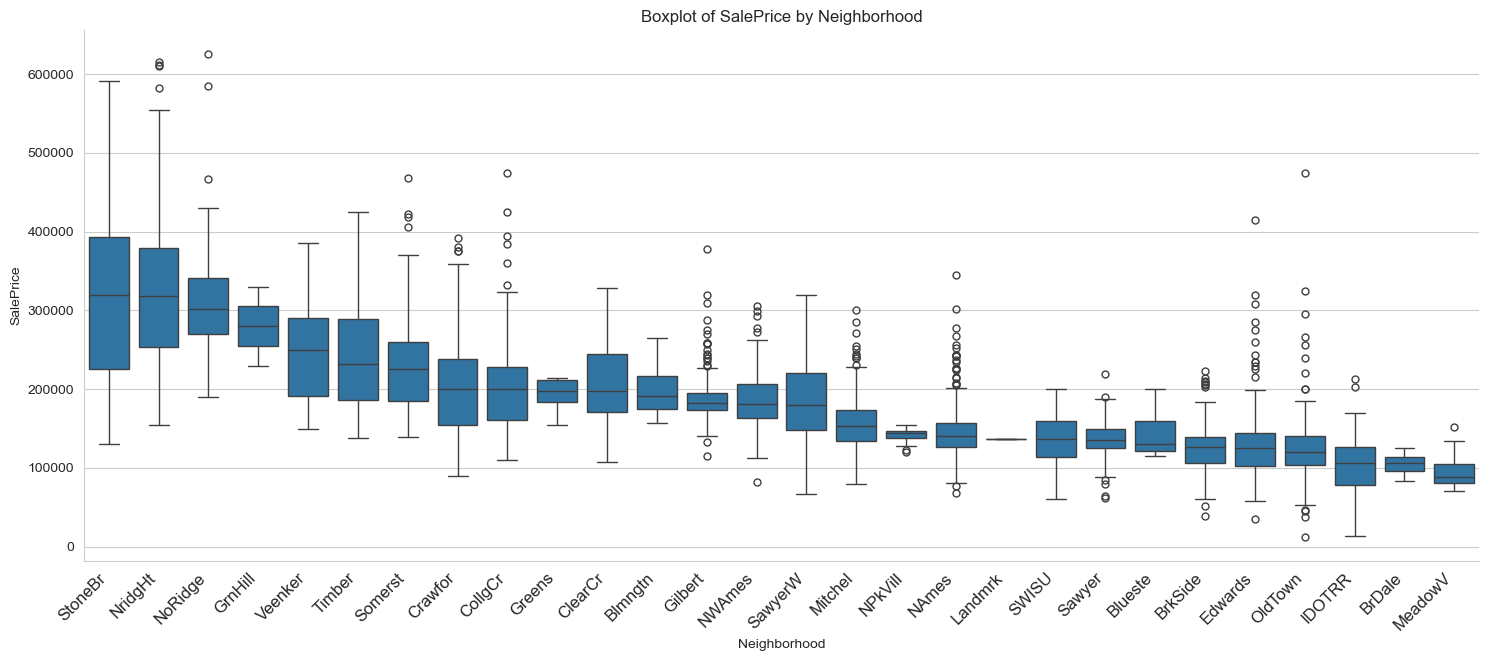

In [36]:
# Plotting a boxplot of the 28 Neighborhood and Saleprice
sns.set_style("whitegrid")
g = sns.catplot(x='Neighborhood', 
                y='SalePrice',
                data=raw_df,
                order = list(median_price_by_nghd.index), # index of median table contains neighborhoods sorted by price
                kind='box', height=6, aspect=2.5)
g.set_xticklabels(rotation=45, ha='right', size=12)
plt.title(label='Boxplot of SalePrice by Neighborhood')
plt.show()

The above boxplot has shown that any particular neighborhood (e.g. `StoneBr`) can share similar characteristics with another (e.g. `NridgHt`), resulting in them having nearly similar median price values that do not exceed each others' interquartile ranges.

At the same time, they can be so different from others (compare between `StoneBr` and `Mitchel`) that their interquartile ranges do not intersect on the sale price scale.

# **Heatmap analysis of top correlations between features and SalePrice**
In order to analyse the relationships of the property attributes with sale price, we use a heatmap to investigate the top 30 columns (about 13% of the current total number of columns) in terms of correlation to `SalePrice`

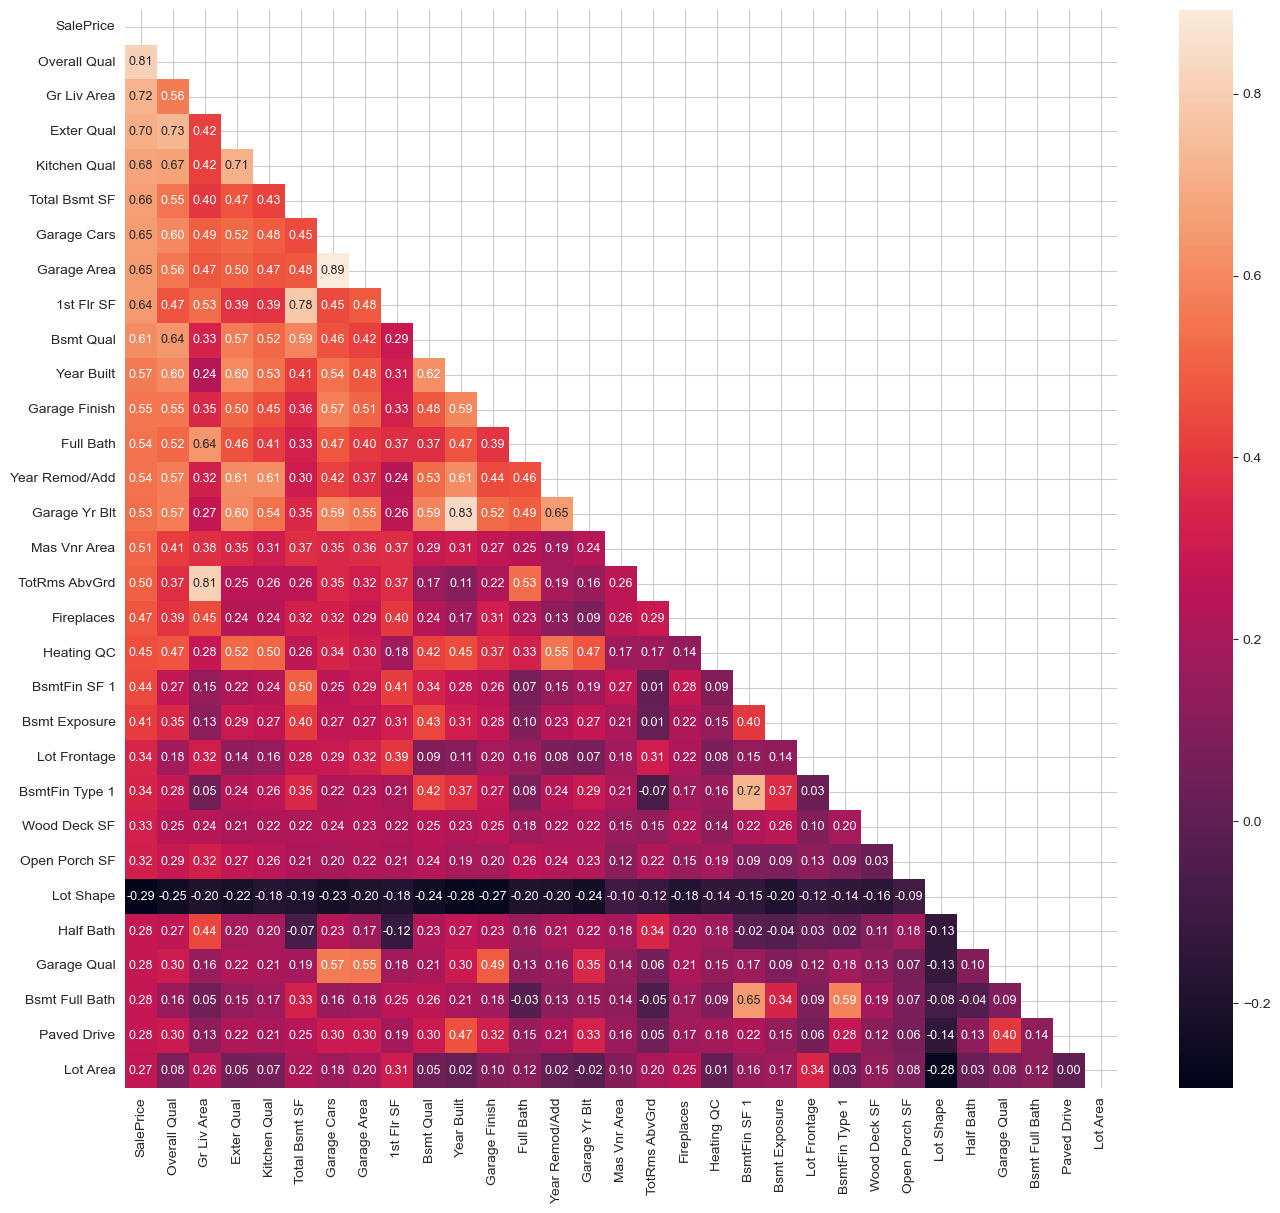

In [41]:
# put labels back into dataframe
#x_v2 = pd.concat([x_train_v2, y_train], axis=1)

# Select only numeric columns
numeric_df = raw_df.select_dtypes(include=[np.number])

# Now compute correlations
correlations_with_ref_to_saleprice = numeric_df.corr().loc[:, 'SalePrice']

# Get top correlations
top_correlations = correlations_with_ref_to_saleprice.abs().sort_values(ascending=False).head(31)

# Compute correlation matrix of top correlated features
top_corr_matrix = numeric_df.loc[:, list(top_correlations.index)].corr()

# Create mask for upper triangle
mask = np.zeros_like(top_corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
plt.figure(figsize=(16, 14))
g = sns.heatmap(top_corr_matrix, annot=True, annot_kws={"size": 9}, fmt='.2f', mask=mask)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()


When `SalePrice`-centric correlations are sorted in descending order, we observe a few familiar variables that exhibit strong relationship with property price. Right at the top is `Overall Qual` at 0.81, which scores the property on its overall construction quality. This is followed by `Gr Liv Area` at 0.72, which indicates the size of the living space on the property. As we traverse down further, more quality-centric and size-centric variables can be seen, such as `Bsmt Qual` in 9th place and `1st Flr SF` in 8th. Discrete variables like `Garage Cars` (garage capacity in terms of cars) in 6th place and `Year Built` in 10th place do exhibit positive correlation with `SalePrice`.

# **CONCLUSION**

I learned from my investigation that prices vary by neighbourhood, sales price increases depend on living areas, and certain places with lower prices may not have garages.